<a href="https://colab.research.google.com/github/stevengregori92/Titanic-with-KNN-and-RF/blob/main/Titanic_with_KNN_and_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [1]:
!pip install luwiji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.tuning import grid_search_params as gsp
from jcopml.plot import plot_missing_value

#Import Dataset

In [3]:
df = pd.read_csv('titanic.csv', index_col = 'PassengerId')
df.drop(columns = ['Name','Ticket','Cabin'], inplace = True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


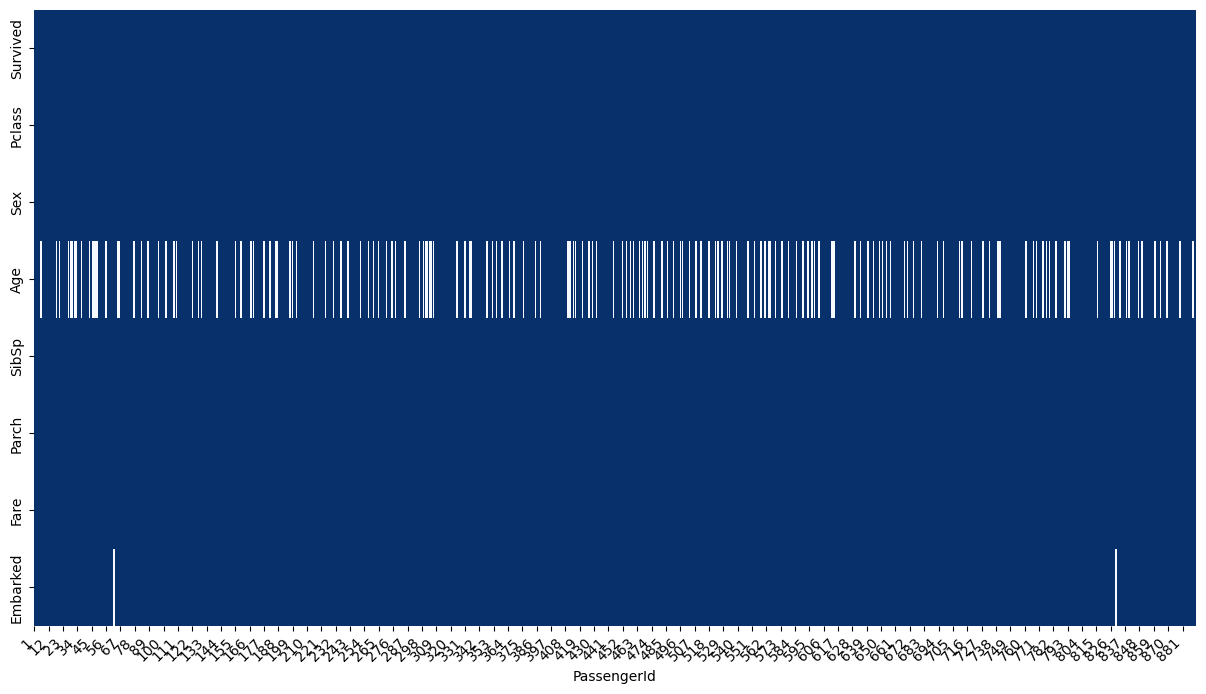

In [10]:
plot_missing_value(df)

#Data Splitting

In [4]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [5]:
X = df.drop(columns=['Survived'])
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712,), (179,))

#Normal

In [15]:
#Preprocessing
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='robust'), ['Parch', 'SibSp', 'Age', 'Fare']),
    ('categoric', cat_pipe(encoder = 'onehot'), ['Pclass', 'Sex', 'Embarked'])
])

#Pipeline
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier())
])

#Training
model = GridSearchCV(pipeline, gsp.knn_params, cv=3, n_jobs=-1, verbose = 1)
model.fit(X_train, y_train)

#Evaluate
print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_,model.score(X_test, y_test))

Fitting 3 folds for each of 90 candidates, totalling 270 fits
{'algo__n_neighbors': 13, 'algo__p': 1.5, 'algo__weights': 'uniform'}
0.827247191011236 0.8188431490739756 0.8268156424581006


#Polynomial

In [16]:
from jcopml.feature_importance import mean_score_decrease

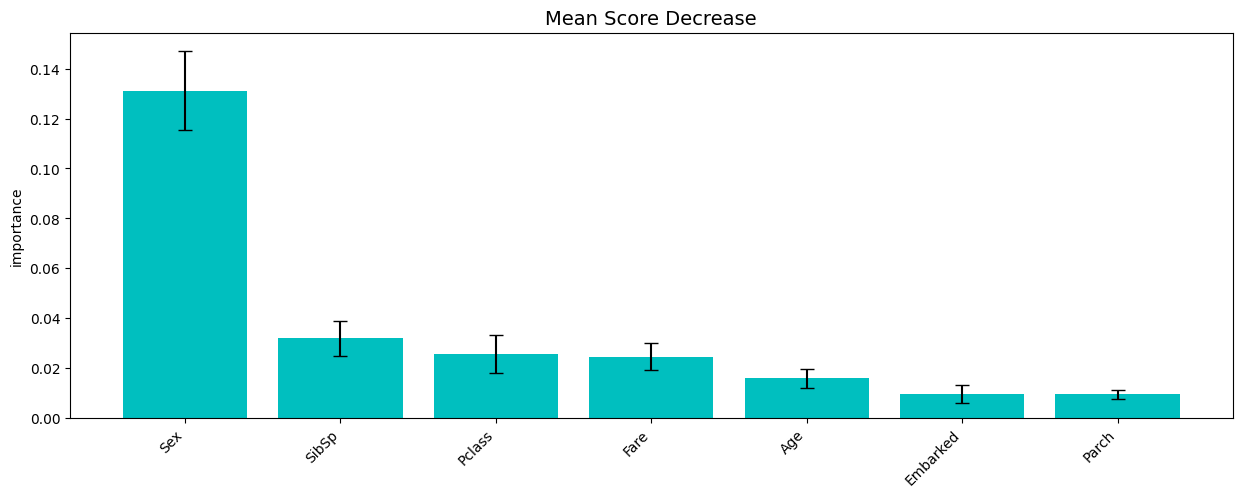

In [17]:
data_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk = 10)

In [21]:
#Preprocessing
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2), ['Parch', 'SibSp', 'Age', 'Fare']),
    ('categoric', cat_pipe(encoder = 'onehot'), ['Pclass', 'Sex', 'Embarked'])
])

#Pipeline
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

#Training
model = GridSearchCV(pipeline, gsp.rf_params, cv=3, n_jobs=-1, verbose = 1)
model.fit(X_train, y_train)

#Evaluation
print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_,model.score(X_test, y_test))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'algo__max_depth': 20, 'algo__max_features': 0.3, 'algo__min_samples_leaf': 5, 'algo__n_estimators': 100}
0.8806179775280899 0.828658889716224 0.8100558659217877
